# Data analysis project

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and clean data

## Education data

We have chosen our data from Danmarks Statistik from the table STATUS42. This data shows the level of individuals education given the level of their parents education. We have chosen to devide the parents' level of education such that: 

"Grundskole" and "Uoplyst mv." are given the variable name "Unskilled".

"Gymnasiale uddannelser" and "Adgangsgivende uddannelsesforløb" are given the variable name "Lowedu".

"Erhvervsfaglige uddannelser", "Korte videregående uddannelser" and "Mellemlange videregående uddannelser" are given the variable name "Midedu".

"Bacheloruddannelser", "Lange videregående uddannelser" and "Ph.d. og forskeruddannelser" are given the name "Highedu". 

In [120]:
# Loading data
edu = pd.read_excel('data.xlsx', index_col='Udd')
edu.head()

,Aar,I alt,H10 Grundskole,H20 Gymnasiale uddannelser,H30 Erhvervsfaglige uddannelser,H35 Adgangsgivende uddannelsesforløb,"H40 Korte videregående uddannelser, KVU","H50 Mellemlange videregående uddannelser, MVU","H60 Bacheloruddannelser, BACH","H70 Lange videregående uddannelser, LVU",H80 Ph.d. og forskeruddannelser,H90 Uoplyst mv.
Udd,,,,,,,,,,,,
FULDFØRT VIDEREGÅENDE UDDANNELSE,2005,100,16.44,1.13,36.66,0.01,3.93,25.00,0.92,11.82,0.22,3.86
IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,2005,100,13.16,1.57,33.38,0.02,3.68,23.60,0.86,9.99,0.26,13.48
INGEN VIDEREGÅENDE UDDANNELSE,2005,100,37.87,0.69,44.82,0.01,2.60,8.80,0.25,1.69,0.02,3.25
AFBRUDT VIDEREGÅENDE UDDANNELSE,2005,100,19.38,1.55,41.00,0.00,3.99,19.99,0.76,7.85,0.15,5.33
FULDFØRT VIDEREGÅENDE UDDANNELSE,2006,100,15.49,1.18,36.72,0.01,4.00,25.53,0.95,12.00,0.24,3.88


In [121]:
# Creating new education variables
edu["Unskilled"] = (edu["H10 Grundskole"]+edu["H90 Uoplyst mv."])
edu["Lowedu"] = (edu["H20 Gymnasiale uddannelser"]+edu["H35 Adgangsgivende uddannelsesforløb"])
edu["Midedu"] = (edu["H30 Erhvervsfaglige uddannelser"]+edu["H40 Korte videregående uddannelser, KVU"]+edu["H50 Mellemlange videregående uddannelser, MVU"])
edu["Highedu"] = (edu["H60 Bacheloruddannelser, BACH"]+edu["H70 Lange videregående uddannelser, LVU"]+edu["H80 Ph.d. og forskeruddannelser"])
edu.head()

,Aar,I alt,H10 Grundskole,H20 Gymnasiale uddannelser,H30 Erhvervsfaglige uddannelser,H35 Adgangsgivende uddannelsesforløb,"H40 Korte videregående uddannelser, KVU","H50 Mellemlange videregående uddannelser, MVU","H60 Bacheloruddannelser, BACH","H70 Lange videregående uddannelser, LVU",H80 Ph.d. og forskeruddannelser,H90 Uoplyst mv.,Unskilled,Lowedu,Midedu,Highedu
Udd,,,,,,,,,,,,,,,,
FULDFØRT VIDEREGÅENDE UDDANNELSE,2005,100,16.44,1.13,36.66,0.01,3.93,25.00,0.92,11.82,0.22,3.86,20.30,1.14,65.59,12.96
IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,2005,100,13.16,1.57,33.38,0.02,3.68,23.60,0.86,9.99,0.26,13.48,26.64,1.59,60.66,11.11
INGEN VIDEREGÅENDE UDDANNELSE,2005,100,37.87,0.69,44.82,0.01,2.60,8.80,0.25,1.69,0.02,3.25,41.12,0.70,56.22,1.96
AFBRUDT VIDEREGÅENDE UDDANNELSE,2005,100,19.38,1.55,41.00,0.00,3.99,19.99,0.76,7.85,0.15,5.33,24.71,1.55,64.98,8.76
FULDFØRT VIDEREGÅENDE UDDANNELSE,2006,100,15.49,1.18,36.72,0.01,4.00,25.53,0.95,12.00,0.24,3.88,19.37,1.19,66.25,13.19


In [122]:
# Deleting the old variables and unnecessary variables
newedu = edu.drop(['I alt', 'H10 Grundskole', 'H20 Gymnasiale uddannelser', 'H30 Erhvervsfaglige uddannelser', 'H35 Adgangsgivende uddannelsesforløb', 'H40 Korte videregående uddannelser, KVU', 'H50 Mellemlange videregående uddannelser, MVU', 'H60 Bacheloruddannelser, BACH', 'H70 Lange videregående uddannelser, LVU', 'H80 Ph.d. og forskeruddannelser', 'H90 Uoplyst mv.'], 1)
newedu.head()

,Aar,Unskilled,Lowedu,Midedu,Highedu
Udd,,,,,
FULDFØRT VIDEREGÅENDE UDDANNELSE,2005,20.30,1.14,65.59,12.96
IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,2005,26.64,1.59,60.66,11.11
INGEN VIDEREGÅENDE UDDANNELSE,2005,41.12,0.70,56.22,1.96
AFBRUDT VIDEREGÅENDE UDDANNELSE,2005,24.71,1.55,64.98,8.76
FULDFØRT VIDEREGÅENDE UDDANNELSE,2006,19.37,1.19,66.25,13.19


# Data analysis

In [123]:
# Calculating the mean within every group of education in the period from 2005 to 2018
newedu.groupby('Udd').agg(['mean']).round(2)

,Aar,Unskilled,Lowedu,Midedu,Highedu
,mean,mean,mean,mean,mean
Udd,,,,,
AFBRUDT VIDEREGÅENDE UDDANNELSE,2011.5,22.08,2.10,67.10,8.73
FULDFØRT VIDEREGÅENDE UDDANNELSE,2011.5,16.33,1.58,67.71,14.38
IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,2011.5,28.84,2.25,58.71,10.19
INGEN VIDEREGÅENDE UDDANNELSE,2011.5,34.36,1.23,62.11,2.30


We struggeled to write a code that could make the figure directly from the data, which is why we did it manualy with the following code.

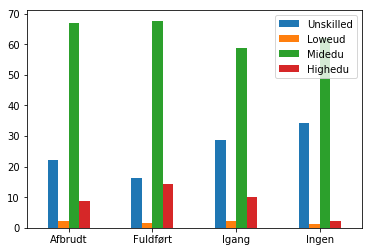

In [124]:
Unskilled = (22.08, 16.33, 28.84, 34.36)
Lowedu = (2.10, 1.58, 2.25, 1.23)
Midedu = (67.10, 67.71, 58.71, 62.11)
Highedu = (8.73, 14.38, 10.19, 2.30)

data = pd.DataFrame({'Unskilled': Unskilled, 'Loweud': Lowedu, 'Midedu': Midedu, 'Highedu': Highedu}, index = index)

index = ['Afbrudt', 'Fuldført', 'Igang', 'Ingen']

ax = data.plot.bar(rot=0)

As we can tell by the figure, people who finished a high education have the highest share of parents with high educations and the lowest share of parents who are unskilled. People without a high education have the lowest share of high educated parent and the highest share of uneducated parents. People who are currently under education have the lowest level of parents with a medium level of education and a relatively high level of parents who are unskilled or with a high education. 

In [125]:
# Creating a dataset that only contains people who finished a high level of education
newedu_copy = newedu.copy()
newedu_copy.drop(['AFBRUDT VIDEREGÅENDE UDDANNELSE', 'IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE', 'INGEN VIDEREGÅENDE UDDANNELSE'], inplace = True)
newedu_copy

,Aar,Unskilled,Lowedu,Midedu,Highedu
Udd,,,,,
FULDFØRT VIDEREGÅENDE UDDANNELSE,2005,20.30,1.14,65.59,12.96
FULDFØRT VIDEREGÅENDE UDDANNELSE,2006,19.37,1.19,66.25,13.19
FULDFØRT VIDEREGÅENDE UDDANNELSE,2007,18.55,1.25,66.76,13.43
FULDFØRT VIDEREGÅENDE UDDANNELSE,2008,17.83,1.30,67.18,13.68
FULDFØRT VIDEREGÅENDE UDDANNELSE,2009,17.12,1.36,67.57,13.95
FULDFØRT VIDEREGÅENDE UDDANNELSE,2010,16.50,1.42,67.85,14.23
FULDFØRT VIDEREGÅENDE UDDANNELSE,2011,15.97,1.50,68.04,14.49
FULDFØRT VIDEREGÅENDE UDDANNELSE,2012,15.48,1.60,68.16,14.77
FULDFØRT VIDEREGÅENDE UDDANNELSE,2013,15.08,1.67,68.23,15.03


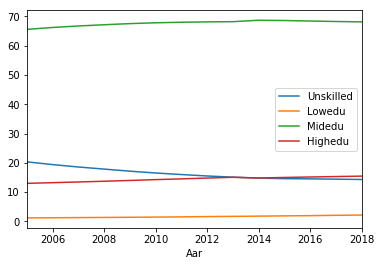

In [126]:
# Plotting the parents' level of education over time for people who finished a high level of education
fig, ax = plt.subplots()
newedu_copy.plot(x = 'Aar', y = 'Unskilled', ax = ax)
newedu_copy.plot(x = 'Aar', y = 'Lowedu', ax = ax)
newedu_copy.plot(x = 'Aar', y = 'Midedu', ax = ax)
newedu_copy.plot(x = 'Aar', y = 'Highedu', ax = ax)

We clearly see that the overall level of education of the parent has grown in the period from 2005 to 2018. The share of parents who are unskilled has decreased since 2005 whereas both low, medium and high educated parents has proportionatly increased.

In [63]:
# Creating a dataset that only contains people who did not finish a high level of education
newedu_copytwo = newedu.copy()
newedu_copytwo.drop(['AFBRUDT VIDEREGÅENDE UDDANNELSE', 'IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE', 'FULDFØRT VIDEREGÅENDE UDDANNELSE'], inplace = True)
newedu_copytwo

,Aar,Unskilled,Lowedu,Midedu,Highedu
Udd,,,,,
INGEN VIDEREGÅENDE UDDANNELSE,2005,41.12,0.70,56.22,1.96
INGEN VIDEREGÅENDE UDDANNELSE,2006,39.91,0.76,57.32,2.00
INGEN VIDEREGÅENDE UDDANNELSE,2007,38.76,0.82,58.34,2.07
INGEN VIDEREGÅENDE UDDANNELSE,2008,37.60,0.89,59.40,2.13
INGEN VIDEREGÅENDE UDDANNELSE,2009,36.45,0.96,60.42,2.16
INGEN VIDEREGÅENDE UDDANNELSE,2010,35.32,1.05,61.40,2.22
INGEN VIDEREGÅENDE UDDANNELSE,2011,34.27,1.14,62.31,2.29
INGEN VIDEREGÅENDE UDDANNELSE,2012,33.34,1.24,63.09,2.34
INGEN VIDEREGÅENDE UDDANNELSE,2013,32.47,1.34,63.78,2.41


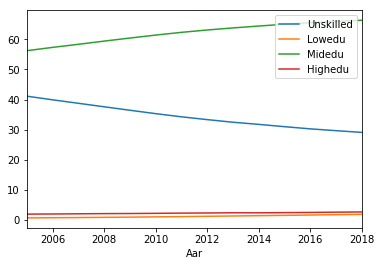

In [65]:
# Plotting the parents' level of education over time for people who did not finish a high level of education
figtwo, ax = plt.subplots()
newedu_copytwo.plot(x = 'Aar', y = 'Unskilled', ax = ax)
newedu_copytwo.plot(x = 'Aar', y = 'Lowedu', ax = ax)
newedu_copytwo.plot(x = 'Aar', y = 'Midedu', ax = ax)
newedu_copytwo.plot(x = 'Aar', y = 'Highedu', ax = ax)

In this figure we see that the share of parents without an education has decrease approxemately as much as the share of parents with a medium level of education has increased. Both parents with a low and high level of education have not changed much since 2005. 

In [118]:
# Calculating the mean of parents' level of education within every year in the period from 2005 to 2018 
newedu.groupby('Aar').agg(['mean']).round(2)

,Unskilled,Lowedu,Midedu,Highedu
,mean,mean,mean,mean
Aar,,,,
2005,28.19,1.24,61.86,8.70
2006,27.62,1.32,62.38,8.68
2007,27.11,1.39,62.73,8.76
2008,26.66,1.48,63.02,8.85
2009,26.24,1.56,63.30,8.90
2010,25.92,1.64,63.56,8.88
2011,25.42,1.71,63.93,8.93
2012,25.04,1.80,64.20,8.97


Overall we see that the share of parents who are unskilled has decrease, while every other level of education has increase their share. 